In [ ]:
# Feature Space: Plot Neighborhoods in Feature Space

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
all_data = pd.DataFrame()
for city in ['nyc']:
    file = '../../Data/data_'+city+'.csv'
    data = pd.read_csv(file)
    print(len(data))
    data = data[data['disadvantaged']==True]
    print(len(data))
    data = data[data['count_listings']>=5]
    print(len(data))
    print()
    # Percentile of Index 
    for p in ['index_change']:
        perc = []
        curr = data[pd.notna(data[p])]

        for i,r in data.iterrows():
            if pd.notna(r[p]):
                perc.append(stats.percentileofscore(curr[p], r[p]))
            else:
                perc.append(np.nan)
        data[p+'_perc'] = perc
    all_data = pd.concat([all_data, data])

185
83
79



In [3]:
for p in ['index_change']:
    perc = []

    for i,r in all_data.iterrows():
        if pd.notna(r[p]):
            perc.append(stats.percentileofscore(all_data[p], r[p]))
        else:
            perc.append(np.nan)
    all_data[p+'_perc'] = perc

In [4]:
# Best LDA
lda_features = {}
for f in data.columns:
    if 'lda' in f and 'std' not in f and 'pca' not in f:
        lda_features[f] = abs(stats.pearsonr(data[f], data['index_change'])[0])
lda_features = {k: v for k, v in sorted(lda_features.items(), key=lambda item: item[1], reverse=True)}

lda_feature = list(lda_features.keys())[0]
print(lda_feature)

lda_4


In [5]:
# Best DTV
dtv_features = {}
for f in data.columns:
    if 'dtv' in f and 'std' not in f and 'pca' not in f:
        dtv_features[f] = abs(stats.pearsonr(data[f], data['index_change'])[0])
dtv_features = {k: v for k, v in sorted(dtv_features.items(), key=lambda item: item[1], reverse=True)}

dtv_feature = list(dtv_features.keys())[0]
print(dtv_feature)

dtv_2


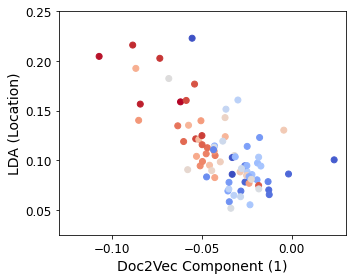

In [6]:
plt.rcParams["figure.figsize"] = [5,4]
fig = plt.figure()

plt.scatter(all_data[dtv_feature], all_data[lda_feature], c=all_data['index_change_perc'], cmap='coolwarm')


plt.xlabel('Doc2Vec Component (1)', fontsize=14)
plt.ylabel('LDA (Location)', fontsize=14)
plt.tick_params(labelsize=12)

plt.xlim(-.13,0.03)
plt.ylim(0.025, 0.25)
plt.xticks([-.10, -.05, 0])
plt.yticks([0.05,0.10,0.15,0.20, 0.25])
#plt.show()

fig.tight_layout()


fig.savefig(city+'_dtv_lda.eps', format='eps', dpi=1000)

In [ ]:
plt.rcParams["figure.figsize"] = [5,4]
fig = plt.figure()

plt.scatter(all_data[dtv_feature], all_data[lda_feature], c=all_data['index_change_perc'], cmap='coolwarm')


plt.xlabel('Doc2Vec Component (1)', fontsize=14)
plt.ylabel('LDA (Location)', fontsize=14)
plt.tick_params(labelsize=12)

plt.xlim(.03,0.17)
plt.ylim(0.025, 0.25)
plt.xticks([0.05, 0.10, 0.15])
plt.yticks([0.05,0.10,0.15,0.20, 0.25])
#plt.show()

fig.tight_layout()


fig.savefig(city+'_dtv_lda.eps', format='eps', dpi=1000)

In [ ]:
plt.rcParams["figure.figsize"] = [5,4]
fig = plt.figure()

plt.scatter(all_data[dtv_feature], all_data[lda_feature], c=all_data['index_change_perc'], cmap='coolwarm')


plt.xlabel('Doc2Vec Component (1)', fontsize=14)
plt.ylabel('LDA (Location)', fontsize=14)
plt.tick_params(labelsize=12)

plt.xlim(-.12,0.02)
plt.ylim(0.025, 0.25)
plt.xticks([-.10, -.05, 0])
plt.yticks([0.05,0.10,0.15,0.20, 0.25])
#plt.show()

fig.tight_layout()


fig.savefig(city+'_dtv_lda.eps', format='eps', dpi=1000)